The Sock Problem
Goal: Write functions that describe the sock problem then perform bpe

In [86]:
#Imports
import numpy as np
import matplotlib    
import matplotlib.pyplot as plt
import random

In [87]:
def drawer(red_fraction = 0.75):
    color = random.random()
    if color < red_fraction:
        return True
    else:
        return False

In [88]:
def likelihood(x,N=5):

    if x == True:
        #pl = [0, .25, .5, .75, 1]
        p = 0
        pl = []
        for i in range(N):
            pl.append(p)
            p += 1/(N-1)
    else:
        #pl = [1, .75, .5, .25, 0]
        p = 1
        pl = []
        for i in range(N):
            pl.append(p)
            p -= 1/(N-1)
    return pl
        

In [91]:
def bayes(n,N=5, red_fraction = 0.75):
    # global count 
    # count = 0 # first run
    obs1 = drawer(red_fraction)
    lik1 = likelihood(obs1,N) #gives list of probabilities
    joint1 = []
    for i in range(N):
        joint1.append(lik1[i]*(1/N))
    evidence1 = 0.5
    posterior = []
    for i in range(N):
        posterior.append(joint1[i]/evidence1)
    def bayes2(posterior):
        obs = drawer(red_fraction)
        prior = posterior
        lik = likelihood(obs,N)
        joint = []
        evidence = 0
        for i in range(N):
            joint.append(lik[i]*prior[i])
            evidence += lik[i]*prior[i]
        posterior = []
        for i in range(N):
            posterior.append(joint[i]/evidence)
        return posterior
    # bayes2(posterior)
    posts = []
    for i in range(n):
        posts.append(posterior)
        posterior = bayes2(posterior)
        
    return posterior, posts

[]


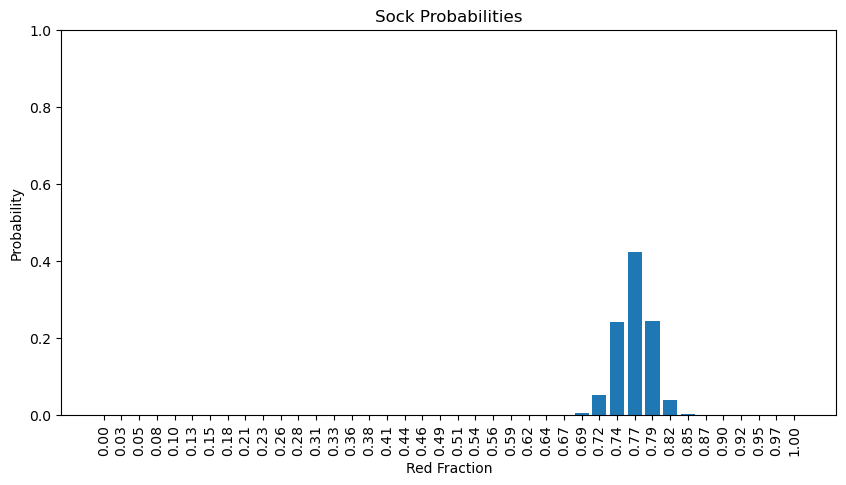

In [92]:
n = 299 # num iterations
N = 40 # num socks
red_fraction = 30/40
plot, posts = bayes(n,N,red_fraction) 
prior = [1/N for i in range(N)]
posts.insert(0, prior)
posts = np.array(posts)

good_list = []
p = 0
pl = []
for i in range(N):
    good_list.append("{:.2f}".format(p))
    p += 1/(N-1)
print(pl)


plt.figure(figsize=(10,5))
plt.ylim([0, 1])
plt.xlabel("Red Fraction")
plt.title("Sock Probabilities")
plt.ylabel("Probability")
plt.xticks(rotation='vertical')
plt.bar(good_list, plot)
plt.ylim([0, 1])
plt.show()

In [59]:
# for making gifs
for i, post in enumerate(posts):
    plt.figure(figsize=(10,5))
    plt.ylim([0, 1])
    plt.xlabel("Red Fraction")
    plt.title("Sock Probabilities")
    plt.ylabel("Probability")
    plt.xticks(rotation='vertical')
    plt.bar(good_list, post)
   # plt.savefig("fig" + str(i) + ".png")
    plt.close()

[]
